In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [46]:
spotify_df = pd.read_csv('/Users/tarushnandrajog/Downloads/spotify-2023_utf8.csv')

In [47]:
# Imputing missing values
spotify_df['in_shazam_charts'].fillna(0, inplace=True)  # Assuming missing values indicate absence from the charts
most_common_key = spotify_df['key'].mode()[0]  # Finding the most common key
spotify_df['key'].fillna(most_common_key, inplace=True)  # Imputing with the most common key
spotify_df = spotify_df.drop(574).reset_index(drop=True) #Drop row with erronous data
spotify_df['streams'] = spotify_df['streams'].astype(float) #Convert streams column to float values
 
# Creating a ranked column based on streams
spotify_df['popularity_rank'] = spotify_df['streams'].rank(ascending=False).astype(int)

# Display the modified dataframe to verify changes
spotify_df[['track_name', 'streams', 'popularity_rank']].head()

,track_name,streams,popularity_rank
0,Seven (feat. Latto) (Explicit Ver.),141381703.0,715
1,LALA,133716286.0,737
2,vampire,140003974.0,718
3,Cruel Summer,800840817.0,196
4,WHERE SHE GOES,303236322.0,458


In [48]:
spotify_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,popularity_rank
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,B,Major,80,89,83,31,0,8,4,715
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,C#,Major,71,61,74,7,0,10,4,737
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,F,Major,51,32,53,17,0,31,6,718
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,A,Major,55,58,72,11,0,11,15,196
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,A,Minor,65,23,80,14,63,11,6,458


In [49]:
pop_df = spotify_df[['popularity_rank', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

<Axes: >

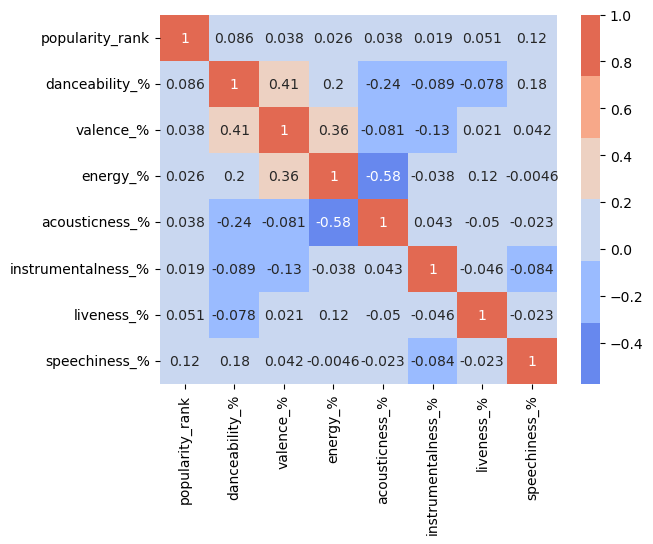

In [50]:
sns.heatmap(pop_df.corr(),cmap=sns.color_palette("coolwarm"), annot=True)

In [51]:
reg_model = smf.ols(formula='Q("popularity_rank") ~ Q("danceability_%")', data=spotify_df).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Q("popularity_rank")   R-squared:                       0.007
Model:                              OLS   Adj. R-squared:                  0.006
Method:                   Least Squares   F-statistic:                     7.135
Date:                  Mon, 27 Nov 2023   Prob (F-statistic):            0.00769
Time:                          18:51:58   Log-Likelihood:                -6693.8
No. Observations:                   952   AIC:                         1.339e+04
Df Residuals:                       950   BIC:                         1.340e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             367.8092     41.648      8.831      0.000     286.077     449.541
Q("danceability_%")     1.6226      0.607      2.671      0.008       0.430       2.815
==============================================================================
Omnibus:                      558.919   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.487
Skew:                           0.021   Prob(JB):                     1.47e-12
Kurtosis:                       1.829   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='danceability_%', ylabel='popularity_rank'>

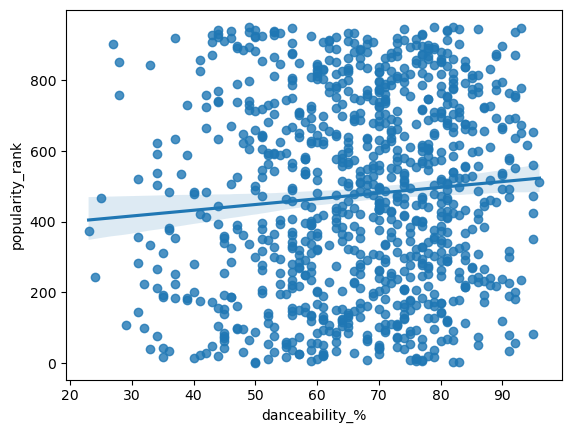

In [52]:
sns.regplot(data=spotify_df, y="popularity_rank", x="danceability_%", ci=95)